In [17]:
import pandas as pd

# Carregar o ficheiro CSV
df = pd.read_csv("AIRPOL_data.csv", sep=';')

#Remover colunas desnecessárias
df = df.iloc[:, :8]

# Corrigir vírgulas em números europeus (por pontos)
df['Affected_Population'] = df['Affected_Population'].str.replace(",", ".").astype(float)
df['Populated_Area[km2]'] = df['Populated_Area[km2]'].str.replace(",", ".").astype(float)
df['Air_Pollution_Average[ug/m3]'] = df['Air_Pollution_Average[ug/m3]'].str.replace(",", ".").astype(float)
df['Value'] = df['Value'].str.replace(",", ".").astype(float)

# Verificar as dimensões do dataset
print("Dimensão do dataset:", df.shape)

# Mostrar um sumário estatístico
print(df.describe(include='all'))

# Ver as primeiras linhas
df.head()

Dimensão do dataset: (49140, 8)
        Country NUTS_Code Air_Pollutant Outcome  Affected_Population  \
count     49140     49140         49140   49140         4.914000e+04   
unique       42      1755             3       6                  NaN   
top     Germany        BA         PM2.5  Asthma                  NaN   
freq      13224       116         29682   10254                  NaN   
mean        NaN       NaN           NaN     NaN         1.023692e+06   
std         NaN       NaN           NaN     NaN         9.085726e+06   
min         NaN       NaN           NaN     NaN         2.674000e+03   
25%         NaN       NaN           NaN     NaN         1.069040e+05   
50%         NaN       NaN           NaN     NaN         2.388280e+05   
75%         NaN       NaN           NaN     NaN         5.988800e+05   
max         NaN       NaN           NaN     NaN         4.680626e+08   

        Populated_Area[km2]  Air_Pollution_Average[ug/m3]          Value  
count          4.914000e+04 

,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value
0,Albania,AL,NO2,Asthma,2337443.0,11299.0,5.5,103.0
1,Albania,AL,PM2.5,Asthma,456076.0,11299.0,11.3,231.0
2,Albania,AL0,NO2,Asthma,2337443.0,11299.0,5.5,103.0
3,Albania,AL0,PM2.5,Asthma,456076.0,11299.0,11.3,231.0
4,Albania,AL03,PM2.5,Asthma,149508.0,4041.5,11.3,69.0


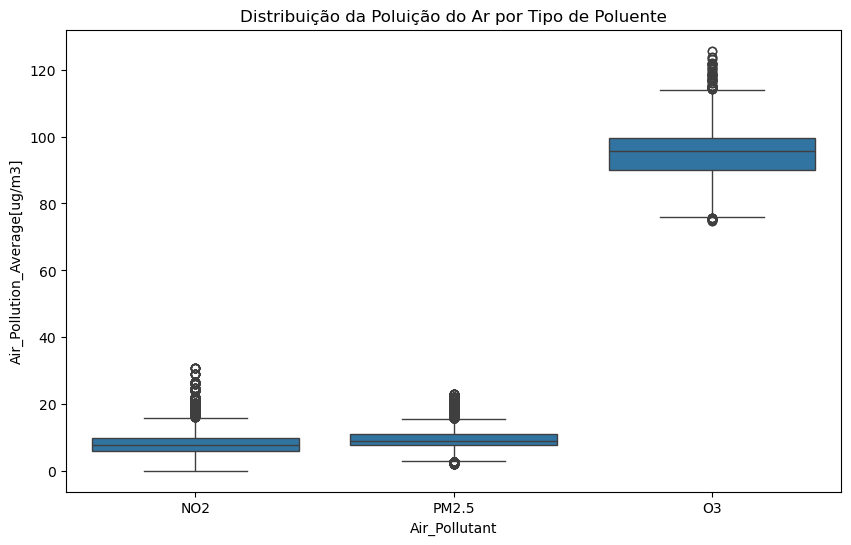

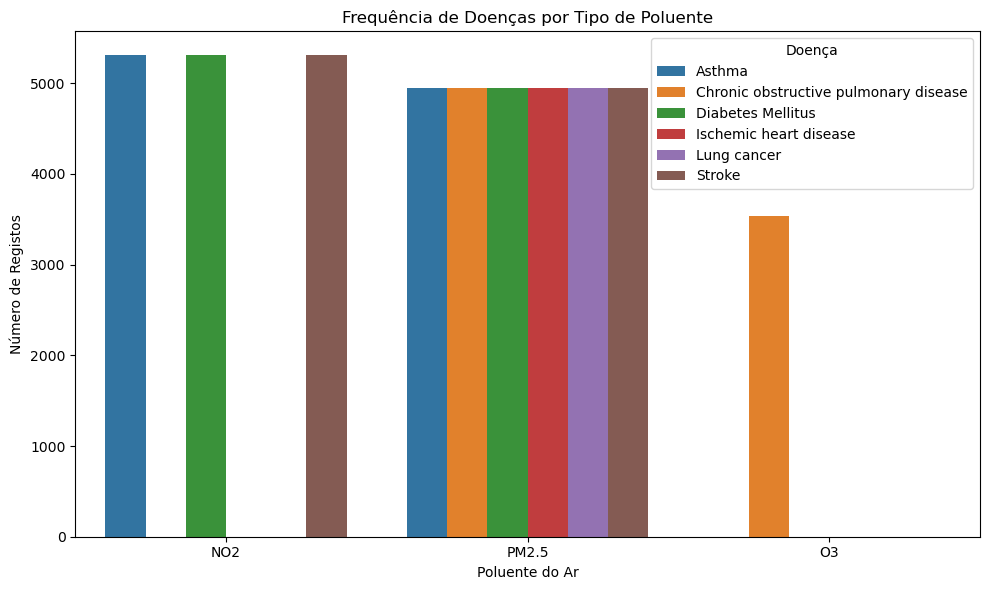

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot dos níveis médios de poluição por tipo de poluente
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Air_Pollutant', y='Air_Pollution_Average[ug/m3]')
plt.title("Distribuição da Poluição do Ar por Tipo de Poluente")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Air_Pollutant', hue='Outcome')
plt.title("Frequência de Doenças por Tipo de Poluente")
plt.xlabel("Poluente do Ar")
plt.ylabel("Número de Registos")
plt.legend(title="Doença")
plt.tight_layout()
plt.show()


In [27]:
# Verificar dados em falta
print(df.isnull().sum())

# Remover ou imputar valores nulos
df = df.dropna()

# Remover duplicados
df = df.drop_duplicates()

# Confirmar tipos
print(df.dtypes)

df.head()

Country                         0
NUTS_Code                       0
Air_Pollutant                   0
Outcome                         0
Affected_Population             0
Populated_Area[km2]             0
Air_Pollution_Average[ug/m3]    0
Value                           0
dtype: int64
Country                          object
NUTS_Code                        object
Air_Pollutant                    object
Outcome                          object
Affected_Population             float64
Populated_Area[km2]             float64
Air_Pollution_Average[ug/m3]    float64
Value                           float64
dtype: object


,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value
0,Albania,AL,NO2,Asthma,2337443.0,11299.0,5.5,103.0
1,Albania,AL,PM2.5,Asthma,456076.0,11299.0,11.3,231.0
2,Albania,AL0,NO2,Asthma,2337443.0,11299.0,5.5,103.0
3,Albania,AL0,PM2.5,Asthma,456076.0,11299.0,11.3,231.0
4,Albania,AL03,PM2.5,Asthma,149508.0,4041.5,11.3,69.0


In [31]:
# Listas de países por região
western = ['Austria', 'Belgium', 'France', 'Germany', 'Netherlands', 'Switzerland']
eastern = ['Poland', 'Czechia', 'Hungary']
southern = ['Greece', 'Spain', 'Italy', 'Portugal']
northern = ['Sweden', 'Denmark', 'Finland']

# Função para mapear
def get_region(country):
    if country in western:
        return 'Western Europe'
    elif country in eastern:
        return 'Eastern Europe'
    elif country in southern:
        return 'Southern Europe'
    elif country in northern:
        return 'Northern Europe'
    else:
        return 'Other'

# Aplicar ao dataset
df['Region'] = df['Country'].apply(get_region)

# Verificar agrupamento
df['Region'].value_counts()

df.head()

,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value,Region
0,Albania,AL,NO2,Asthma,2337443.0,11299.0,5.5,103.0,Other
1,Albania,AL,PM2.5,Asthma,456076.0,11299.0,11.3,231.0,Other
2,Albania,AL0,NO2,Asthma,2337443.0,11299.0,5.5,103.0,Other
3,Albania,AL0,PM2.5,Asthma,456076.0,11299.0,11.3,231.0,Other
4,Albania,AL03,PM2.5,Asthma,149508.0,4041.5,11.3,69.0,Other
